# Capítulo 5 - Análise exploratória de Dados
Vamos utilizar o método de _Exploratory Data Analysis_ para explorar dados do mundo real e obter algumas informações. Os dados que vamos analisar são referentes a **filmes** que receberam **notas** a partir da avaliação de **usuários**, eles podem ser encontrados no site [MovieLens](https://grouplens.org/datasets/movielens/).

Vamos realizar queries, avaliar a Tendência Central, média, mediana e etc. Aliado a isso vamos procurar entender a distribuição das notas dadas ao filmes por meio de gráficos como histogramas e _boxplots_, que nos permitem fazer comparações entre as grandezas disponíveis. 

Para tudo isso serão utilizadas as principais bibliotecas de Python para análise de dados: Pandas, NumPy, Seaborn, Matplotlib. A visualização de dados será abordada, assim como boas e más práticas.

<br />

### Índice
1 - [Investigação inicial](#1-investigação-inicial)  
2 - [Avançando para outro DataSet](#2-avançando-para-outro-_dataset_)  
3 - [Visualizando gráficos](#3-visualizando-gráficos)  
4 - [Tipos de variáveis](#4-tipos-de-variáveis)  
5 - [Visualizando gráficos (de novo)](#5-visualizando-gráficos-(de-novo))  
6 - [Conclusões a partir de grandezas estátisticas](#6-conclusões-a-partir-de-grandezas-estátisticas)  

## 1 Investigação inicial

### 1.1 Notas

Vamos começar pelo arquivo que contém as notas dadas pelos usuários. Vamos carregar o arquivo em formato CSV para um _DataFrame_ e armazená-lo em uma variável chamada `notas_df`, então prosseguimos para uma investigação inicial dos nossos dados:

In [1]:
# antes de tudo, devemos importar a biblioteca Pandas com um apelido
import pandas as pd

In [2]:
# carrega o arquivo de notas (CSV) como um DataFrame
# notas_df = pd.read_csv('data/aula5_ratings.csv')
notas_df = pd.read_csv('https://github.com/brnocesar/learning-data-analysis/blob/main/datasets/aula5_ratings.csv?raw=true')

In [3]:
notas_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas_df.shape

(100836, 4)

In [5]:
# altera os rótulos das colunas
notas_df.columns = ['usuario_id', 'filme_id', 'nota', 'instante']

In [6]:
notas_df.columns

Index(['usuario_id', 'filme_id', 'nota', 'instante'], dtype='object')

In [7]:
notas_df.head()

,usuario_id,filme_id,nota,instante
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# notas possiveis, retorna valores unicos na coluna 'nota'
set(notas_df['nota'])

{0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [9]:
notas_df['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
# numero de ocorrencias de cada nota
notas_df.nota.value_counts()
# quando o nome da coluna não possui espaços ou caracteres especiais, podemos acessar a coluna usando essa notação

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
# média geral das notas
notas_df.nota.mean()

3.501556983616962

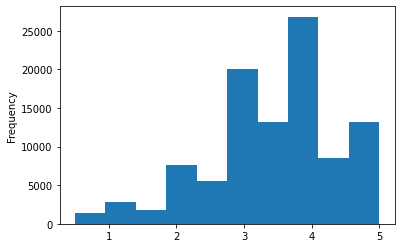

In [12]:
# plotando histograma, um `value_counts()` visual
notas_df['nota'].plot(kind='hist')

In [13]:
# mediana
notas_df['nota'].median()

3.5

In [14]:
notas_df['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [15]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


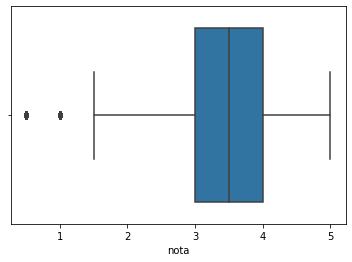

In [16]:
# plotar o `describe()` visual
sns.boxplot(notas_df.nota)

## 2 Avançando para outro _DataSet_

### 2.1 Filmes

Agora vamos carregar um outro arquivo CSV, agora o arquivo de filmes:

In [17]:
# filmes_df = pd.read_csv('data/aula5_movies.csv')
filmes_df = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/aula5_movies.csv')

In [18]:
print(filmes_df.shape)
filmes_df.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Note que os titulos das colunas estão em inglês, então vamos mudar para português, como foi feito para o primeiro arquivo.

In [19]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 2.2. Notas por filme
Vamos considerar a situação em que queremos saber quais foram as notas dadas para um determinado filme. Se no primeiro arquivo temos as notas para cada `filme_id` e no segundo temos o titulo de cada `filme_id`, devemos fazer a seguinte _query_ para obter, digamos, todas as notas para o filme cujo _id_ é igual a **1**:

In [20]:
# cria df apenas com as notas para o filme de ID = 1
notas_filme_um = notas_df.query('filme_id == 1')

In [21]:
print(f"Quantidade de notas: {len(notas_filme_um)}\n")
notas_filme_um.head()

Quantidade de notas: 215



,usuario_id,filme_id,nota,instante
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Por questão de espaço, foram apresentadas apenas as cinco primeiras linhas do _DataFrame_ resultante da _query_. Note que temos 215 linhas, ou seja, 215 usuários deram alguma nota para o filme de _ID_ igual a **1**.

Além disso, todas as outras colunas do _DataFrame_ original também estão presentes neste e, como as outras informações (qual usuário e quando) não nos interessam neste momento, podemos especificar apenas a coluna das notas, obtendo assim uma _series_. Neste caso a query ficaria:

In [22]:
# notas_filme_um = notas_df.query('filme_id == 1').['nota']
notas_filme_um = notas_filme_um['nota']

In [23]:
notas_filme_um.head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

Agora que sei como obter as notas individuais para um filme específico, posso calcular a média de todas as notas de um filme:

In [24]:
notas_filme_um.mean()

3.9209302325581397

Podemos repetir este processo para o filme de _ID_ igual a **2**, por exemplo.

In [25]:
notas_filme_dois = notas_df.query('filme_id == 2')['nota']

In [26]:
print(len(notas_filme_dois))
print(notas_filme_dois.mean())

110
3.4318181818181817


#### 2.2.1 `groupby()`

Se tivermos que realizar este procedimento para cada um dos filmes, perceberemos logo que isso é inviável, então vamos começar a trabalhar uma forma de facilitar essa atividade.

O primeiro passo será agrupar os dados do _DataFrame_ de notas de acordo com a coluna `filme_id`:

In [27]:
agrupado_por_nota = notas_df.groupby('filme_id')
agrupado_por_nota

O resultado disso é que temos um _DataFrame_ agrupado em função dos valores da coluna `filme_id`, e com esse _df_ podemos aplicar funções de agregação em função da coluna agrupada. Uma dessas funções de agregação é a média dos valores de cada uma das colunas para cada valor da coluna `filme_id`:

In [28]:
agrupado_por_nota.mean().head()

,usuario_id,nota,instante
filme_id,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


Note que o _DataFrame_ resultante possui como índice o valor de `filme_id`. E perceba também que a média para as colunas `usuario_id` e `instante` não fazem sentido, então podemos fazer o recorte para a coluna `nota`, resultando em uma _series_:

In [29]:
media_por_filme = agrupado_por_nota.mean()['nota']
media_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Outra questão que podemos avaliar agora é: _"Todos os filmes receberam a mesma quantidade de avaliações? Se não, quantas avaliações foi feita para cada filme?"_

Basta aplicar o método `count()` (outra função de agregação) no _DataFrame_ agrupado:

In [30]:
agrupado_por_nota.count().head()

,usuario_id,nota,instante
filme_id,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


Note que todas as colunas possuem o mesmo valor para cada `filme_id`, o que mostra que nosso _DataFrame_ não possui linhas com valores nulos (o que ja deveria ter sido verificado láááá no inicio dessa análise, mas enfim...).

## 3 Visualizando gráficos
Vamos avaliar como estão distribuídas as médias usando gráficos. Podemos começar plotando um histograma usando Pandas:

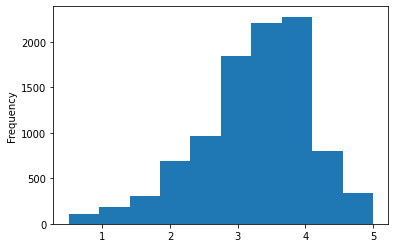

In [31]:
media_por_filme.plot(kind='hist')

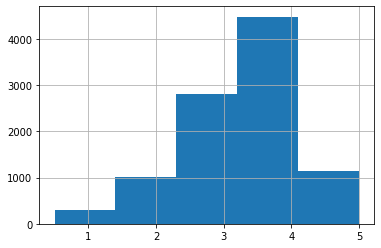

In [32]:
# reduzindo de 10 para 5 faixas de notas
media_por_filme.hist(bins=5)

Podemos fazer um _box plot_ vertical usando Seaborn:

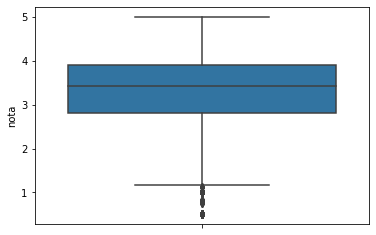

In [33]:
sns.boxplot(y=media_por_filme)

In [34]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Com o Seaborn também é possível fazer histogramas e ele ainda plota uma curva que se aproxima da distribuição dos dados:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


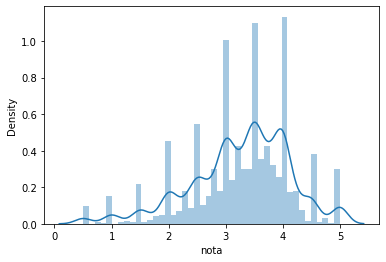

In [35]:
sns.distplot(media_por_filme)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


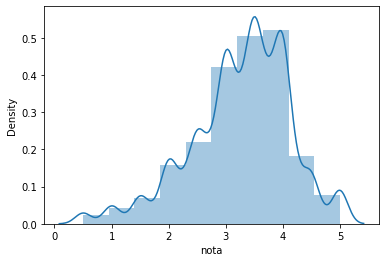

In [36]:
# definindo o mesmo número de intervalos (bins) usado como padrão pelo Pandas
sns.distplot(media_por_filme, bins=10)

### 3.1 Matplotlib

Tanto Pandas como Seaborn utilizam uma outra biblioteca por baixo dos panos, a Matplotlib. 

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das Médias dos filmes')

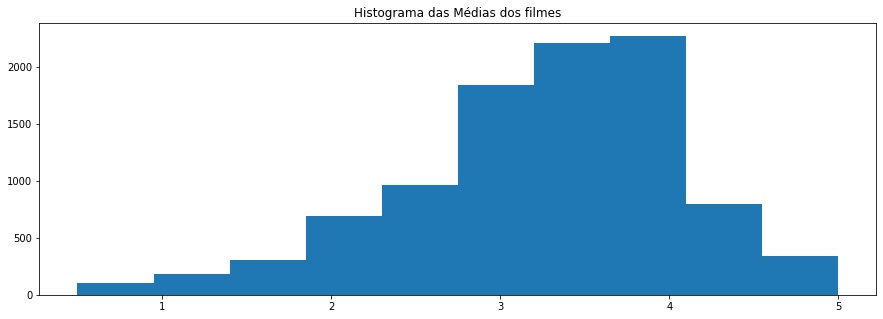

In [38]:
plt.figure(figsize=(15,5))
plt.hist(media_por_filme)
plt.title("Histograma das Médias dos filmes")

## 4 Tipos de variáveis

Vamos começar a explorar um novo _dataset_ e aproveitar para ver algumas classificações para os tipos de valores que as variáveis podem assumir.

Vamos utilizar o [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata), que é um conjunto de dados com cinco mil filmes e está disponível no Kaggle.

In [39]:
# carregando novo dataset de filmes
tmdb = pd.read_csv('https://github.com/brnocesar/learning-data-analysis/blob/main/datasets/aula5_tmdb_5000_movies.csv?raw=true')

In [40]:
print(tmdb.shape)
tmdb.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 4.1 Variáveis categóricas

#### 4.1.1 Categórica nominal

Vamos olhar para a coluna `original_language` desse novo _dataset_. Os valores dessa coluna são os idiomas de cada filme, e podemos dizer que cada idioma é uma categoria. De forma geral, os elementos/registros devem se encaixar em uma categoria apenas, não sendo possível fazer parte de mais de uma. Podem existir casos em que faça sentido cada registro ser classificado em masi de uma categoria, mas isso deve ser levado em conta nas análises.

In [41]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Nessa classificação de valores não existe uma ordem entre as categorias. Por exemplo, não faz sentido estabelecer uma ordem de melhor ou pior. Até poderíamos considerar uma ordem lexicográfica (alfabética), mas no momento isso não tem siginificado algum para o que queremos.

Nessa situação dizemos que essa é uma **variável categórica nominal**.

#### 4.1.2 Categórica ordinal

Essa classificação é destinada para as variáveis que representam categorias, mas que possuem uma ordem entre elas.

Por exemplo, os níveis de educação formal, em que temos: primeiro grau (ensino fundamental), segundo grau (ensino médio) e terceiro grau (ensino superior), Essas categorias possuem uma ordem bem definida em que devem ser cursadas. Mas apesar disso não significa que o intervalo entre cada uma das categorias ordinais seja o mesmo, ou ainda que seja possível realizar operações algébricas entre as categorias.

As variáveis categóricas podem ou não representar quantidades.


### 4.2 Variáveis quantitativas

As variáveis numéricas que representam uma quantidade, possuem ordem e aceitam operações algébricas são chamadas de quantitativas e podem se dividir em dois grupos:

#### 4.2.1 Quantitativa contínua

Seus valores podem assumir qualquer valor em um certo _range_, ou seja, existem infinitos valores possíveis. Uma coluna com esse tipo de valor é a do orçamento (`budget`). 

#### 4.2.2 Quantitativa discreta

Esse tipo de valor é utilizado para as variáveis que podem assumir apenas alguns valores bem definidos em um _range_. Por exemplo, a quantidade de votos (`vote_count`), não é possível que haja 3,5 votos em um filme, deve ser 3 ou 4. Além disso, o intervalo entre cada valor possível deve ser igual.

## 5 Visualizando gráficos (de novo)

Uma das formas mais básicas de comparar categorias é através da contagem de quantos elementos/registros estão presentes em cada uma delas. Então vamos aproveitar para fazer _categorical plots_ utilizando duas abordagens: uma alto nível e outra um pouco menos alto nível (não vou dizer baixo nível porque é Python né...).

Ambas as abordagens farão uso de funções da biblioteca [`seaborn`](https://seaborn.pydata.org/tutorial/categorical.html).

### 5.1 Utilizando função de (menos) alto nível

Começamos extraindo a coluna dos idiomas do _DataFrame_ original, obetendo assim uma _series_ de dados e depois aplicamos o método que conta as aparições dos difentes valores.

In [42]:
filmes_por_idioma = tmdb['original_language'].value_counts()
filmes_por_idioma.head()

en    4505
fr      70
es      32
de      27
zh      27
Name: original_language, dtype: int64

O resultado contínua sendo uma _series_, mas agora o índice é a sigla (em inglês) do idioma e o valor é a quantidade de filmes com esse idioma:

In [43]:
filmes_por_idioma.index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ar', 'ta', 'cs', 'id', 'ro', 'no',
       'ps', 'vi', 'te', 'is', 'xx', 'ky', 'el', 'nb', 'sl', 'hu', 'af', 'pl',
       'tr'],
      dtype='object')

In [44]:
filmes_por_idioma.values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Se quisermos continuar trabalhando com um _DataFrame_ ao invés de uma _series_, usamos o método `to_frame()` para transformá-lo (não _implace_):

In [45]:
filmes_por_idioma.to_frame().head()

,original_language
en,4505
fr,70
es,32
de,27
zh,27


e podemos resetar os indíces para separá-lo em outra coluna:

In [46]:
filmes_por_idioma.to_frame().reset_index().head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


In [47]:
filmes_por_idioma_df = filmes_por_idioma.to_frame().reset_index()
filmes_por_idioma_df.columns = ['original_language', 'total']
filmes_por_idioma_df.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


Agora que temos um _df_ com o total de filmes para cada idioma vamos plotar um gráfico de barras:

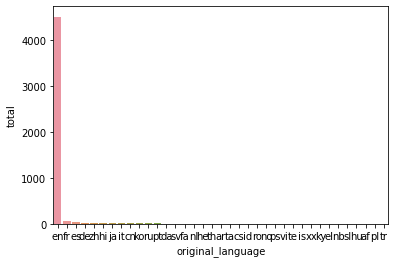

In [48]:
sns.barplot(x='original_language', y='total', data=filmes_por_idioma_df)

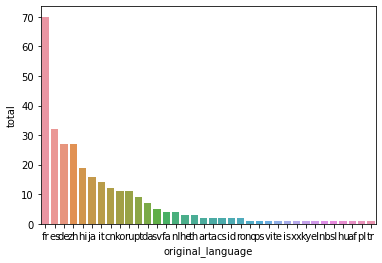

In [49]:
# removendo o idioma inglês
sns.barplot(x='original_language', y='total', data=filmes_por_idioma_df.drop(0))

### 5.2 Utilizando função de alto nível

Existem funções que não precisam da preparação de um _df_, podemos usar o original e apenas indicar o tipo de gráfigo, que no caso é "contagem":

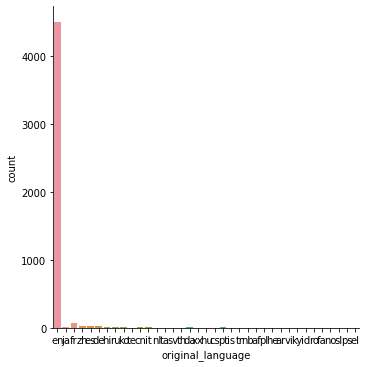

In [50]:
sns.catplot(x='original_language', kind='count', data=tmdb)

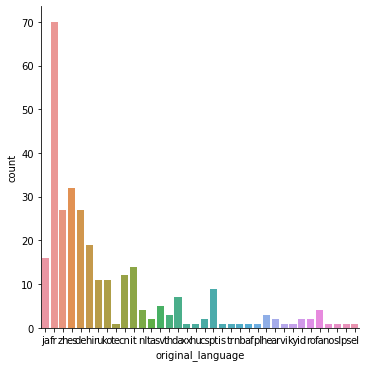

In [51]:
# sns.catplot(x='original_language', kind='count', data=tmdb.query("original_language != 'en'"))

# removendo os filmes com idioma em ingles
tmdb_sem_ingles = tmdb.drop(tmdb[tmdb['original_language']=='en'].index)
sns.catplot(x='original_language', kind='count', data=tmdb_sem_ingles)

Perceba que diferente da abordagem "menos alto nível", aqui as categorias não foram ordenadas. Isso acabamos ganhando de graça ao utilizar o `value_counts()` antes.

### 5.3 Gráfico de pizza

Este é outro tipo de gráfico bastante comum para representar distribuições em categorias. O `seaborn` não plota esse tipo de gráfico, mas o `matplotlib` sim, então partimoos disso:mm

([<matplotlib.patches.Wedge at 0x7fee5dce9710>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

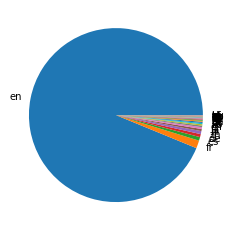

In [52]:
plt.pie(filmes_por_idioma_df['total'], labels=filmes_por_idioma_df['original_language'])

Esse tipo de gráfico tem seu uso altamente desencorajado, em geral pode ser usado com pouquissimas categorias.

### 5.4 Passando uma mensagem

O objetivo da área de visualização de dados é ilustrar uma mensagem da forma mais simples e clara possível. Anteriormente com os gráficos de barras percebemos que o idioma inglês é dominante, e para deixar isso explícito podemos comparar inglês com "todo o resto".

In [53]:
# determinamos as quantidades
total_por_idioma = tmdb['original_language'].value_counts()
total_ingles = total_por_idioma.loc['en']
total_resto = total_por_idioma.sum() - total_ingles
print(total_ingles, total_resto)

4505 298


In [54]:
# dicionario associando as quantidades com rótulos
dados_idiomas = {
    'idiomas': ['ingles', 'outros'],
    'total': [total_ingles, total_resto]
}
dados_idiomas

{'idiomas': ['ingles', 'outros'], 'total': [4505, 298]}

In [55]:
# cria um df a partir do dicionario
dados_idiomas = pd.DataFrame(dados_idiomas)
dados_idiomas

,idiomas,total
0,ingles,4505
1,outros,298


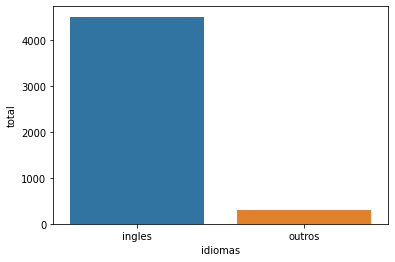

In [56]:
# grafico de barras
sns.barplot(x='idiomas', y='total', data=dados_idiomas)

### 5.5 Analisando todo o resto

Acima já vimos que o inglês é o idioma dominante, então vamos análisar um conjunto de dados apenas com idiomas diferentes do inglês. Anteriormente já plotamos gráficos de barra excluindo o idioma inglês, mas agora vamos refinar a apresentação do gráfico.

In [57]:
filmes_nao_ingles = tmdb.query("original_language != 'en'")
filmes_nao_ingles.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


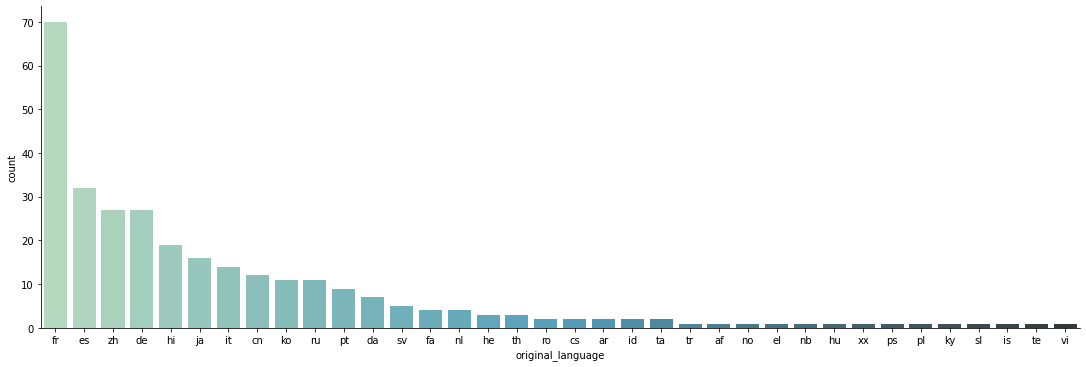

In [58]:
sns.catplot(x='original_language', kind='count', data=filmes_nao_ingles, 
            aspect=3, # aspect ratio da figura
            order=filmes_nao_ingles['original_language'].value_counts().index, # ordena os dados usando value_counts
            palette='GnBu_d' # paleta de cores sequencial
            )

## 6 Conclusões a partir de grandezas estátisticas

Vamos analisar as notas dos dois primieros filmes dos primeiros _datasets_.

In [59]:
# dois primeiros filmes do dataset
filmes_df.head(2)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [60]:
# dfs apenas com as notas de cada filme
notas_toy_story = notas_df.query('filme_id == 1')
notas_jumanji = notas_df.query('filme_id == 2')

print(f"Quantidade de notas\n\nToy Story\t{len(notas_toy_story)}\nJumanji\t\t{len(notas_jumanji)}")

Quantidade de notas

Toy Story	215
Jumanji		110


In [61]:
# medias das notas de cada filme, apresentando apenas duas casas decimais
print('Média das notas\n')
print("Toy Story\t%.2f" % notas_toy_story['nota'].mean())
print("Juanji\t\t%.2f" % notas_jumanji['nota'].mean())

Média das notas

Toy Story	3.92
Juanji		3.43


In [62]:
# mediana das notas de cada filme
print('Mediana das notas\n')
print("Toy Story\t%.2f" % notas_toy_story['nota'].median())
print("Juanji\t\t%.2f" % notas_jumanji['nota'].median())

Mediana das notas

Toy Story	4.00
Juanji		3.50


In [63]:
# moda das notas de cada filme
print('Moda das notas\n')
print("Toy Story\t%.2f" % notas_toy_story['nota'].mode())
print("Juanji\t\t%.2f" % notas_jumanji['nota'].mode())

Moda das notas

Toy Story	4.00
Juanji		4.00


Perceba que apenas calcular a essas grandezas não é suficiente para entender como foi a dinâmica por trás dessas notas. Mesmo calculando a mediana (que separa 50% das notas para cada lado), não tenho informação alguma sobre a distribuição das notas.

Essas medidas apenas nos ajudam a entender como é o comportamento central das notas, cada uma com seu significado, reduzindo toda a distribuição dos dados a um único valor.

### 6.1 Reduzindo uma distribuição de dados e perdendo informação

Vamos utilizar a biblioteca `numpy` para explorar um pouco essa idéia, criando diferentes distribuições de notas para dois filmes imaginários:

In [66]:
# cria uma lista com dez elementos `2.5`
[2.5] * 10

[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]

In [67]:
import numpy as np

# cria um array do numpy a partir de uma lista
np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [68]:
# junta dois arrays numpy
np.append(np.array([2.5] * 10), np.array([3.5] * 10))

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [69]:
# simula notas para dois filmes
notas_filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
notas_filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [70]:
# média dos dois filmes imaginários
print(notas_filme1.mean(), notas_filme2.mean())

3.0 3.0


In [71]:
# mediana para os dois filmes
print(np.median(notas_filme1), np.median(notas_filme2))

3.0 3.0


Veja que para os dois filmes obtivemos os mesmos valores para para média e moda, mesmo sabendo que a distribuição das notas foi bem diferente para cada um deles.

### 6.2 Explorando através de gráficos

Por isso é importante não avaliar apenas um valor pontual. Veja os diferentes tipos de _plot_ que podem ser feitos para as distribuições dos filmes:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


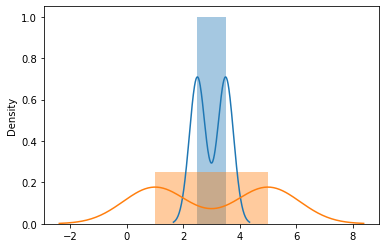

In [75]:
sns.distplot(notas_filme1)
sns.distplot(notas_filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

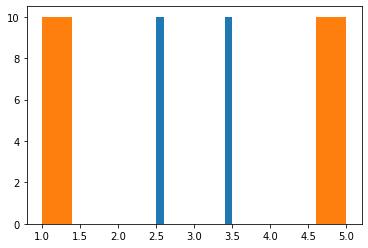

In [76]:
plt.hist(notas_filme1)
plt.hist(notas_filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fee5851ba58>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee5852c4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee5852cf28>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fee5852cba8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fee5851bd68>,
  <matplotlib.lines.Line2D at 0x7fee58535978>]}

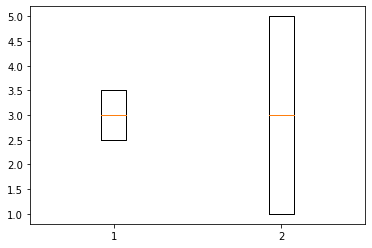

In [79]:
plt.boxplot([notas_filme1, notas_filme2])

Nesse último gráfico fica bem evidente que os dois filmes possuem a mesma mediana, mas distribuições bem diferentes.

Vamos voltar para as notas dos dois primeiros filmes, agora fazendo um gráfico do tipo _boxplot_. Vemos que de fato a concentração das notas do Toy Story está acima do Jumanji.

{'boxes': [<matplotlib.lines.Line2D at 0x7fee50300fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee502909e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee5029b4a8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fee5029b128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fee502902e8>,
  <matplotlib.lines.Line2D at 0x7fee5029bf28>]}

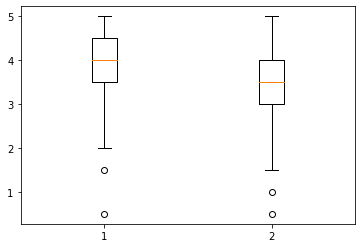

In [89]:
plt.boxplot([notas_toy_story['nota'], notas_jumanji['nota']])

A biblioteca `seaborn` possui várias funcionalidades que permitem fazer essa exploração dos dados sem precisar tratá-los previamente, como fizemos com esses dois filmes.

Poderíamos fazer um _boxplot_ para todos os filmes do _dataset_:

```
sns.boxplot(x='filme_id', y='nota', data=notas_df)
```

Como sei que são muitos filmes e o gráfico vai ficar muito poluído, vou restringir para apenas alguns:

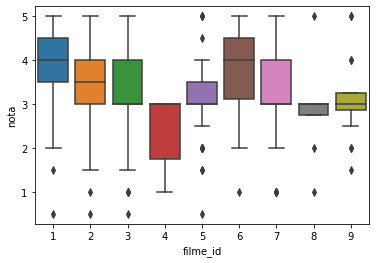

In [88]:
sns.boxplot(x='filme_id', y='nota', data=notas_df.query("filme_id in [1,2,3,4,5,6,7,8,9]"))

### 6.3 Desvio padrão

Olhando para o _boxplot_ dos filmes fictícios, vimos que a dispersão das notas em torno da madiana é bem diferente para cada um deles. Vamos calcular o desvio padrão para essas distribuições, que é um valor que nos informa o quanto os dados se dispersam em torno de uma tendência central.

Note que para os dois primeiros filmes do _dataset_ devemos usar uma função do Pandas, pois é um _DataFrame_ do Pandas, e para os filmes fictícios devemos usar uma função do Numpy:

In [90]:
# desvio padrão
print("Toy Story\t%.2f" % notas_toy_story['nota'].std())
print("Juanji\t\t%.2f" % notas_jumanji['nota'].std())

Desvio padrão das notas

Toy Story	0.83
Juanji		0.88


In [92]:
# desvio padrão
print("filme 1\t\t%.2f" % np.std(notas_filme1))
print("filme 2\t\t%.2f" % np.std(notas_filme2))

filme 1		0.50
filme 2		2.00
